<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/HOML_Exercise_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

from sklearn.model_selection import ShuffleSplit
from sklearn.base import clone
from scipy.stats import mode

In [12]:
#7

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_attributes = {'max_leaf_nodes': list(range(2, 100)),'min_samples_split': [2,3,4]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_attributes, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:    9.9s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,


In [13]:
print(grid_search_cv.best_estimator_)
y_pred = grid_search_cv.predict(X_test)
print(accuracy_score(y_test, y_pred))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
0.8695


In [26]:
#8

n_trees = 1000
n_instances = 100

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train)-n_instances, random_state=42)


mini_sets = []
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

print(len(mini_sets))
print(mini_sets[0][0].shape)

1000
(100, 2)


0.8054499999999999


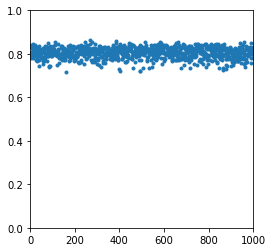

In [33]:
#1000개의 독립 트리를 생성해서 별도로 훈련시켜봄 미니 데이터셋으로 훈련시켜봄

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(np.mean(accuracy_scores))
plt.figure(figsize=(4,4))
plt.plot(range(len(accuracy_scores)), accuracy_scores, '.')
plt.axis([0,1000,0,1])
plt.show()

In [41]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

from collections import Counter
print(Counter(Y_pred[:,0]))

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)
print(y_pred_majority_votes[0][0])


print(accuracy_score(y_test, y_pred_majority_votes.reshape([-1])))

Counter({1: 951, 0: 49})
1
0.872
